In [1]:
## 標準化と正規分布

In [26]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = sns.load_dataset('tips')

In [59]:
df['tip_rate'] = df['tip']/ df['total_bill']

In [60]:
### 68-95-99.7ルール

In [61]:
group1 = []
group2 = []
group3 = []

samples = []
loc=4
scale=3
for i in range(1000):
    sample = stats.norm(loc=loc,scale=scale).rvs()
    if 4 -3 < sample < 4 + 3:
        group1.append(sample)
        len(samples)
    elif 4 - 2*3 < sample < 4+ 2 * 3:
        group2.append(sample)
        len(samples)
    elif 4 - 3*3 < sample < 4 + 3 * 3:
        group3.append(sample)
        len(samples)
    samples.append(sample)

In [62]:
print(len(group1)/len(samples))

0.697


In [63]:
print(len(group1+group2)/len(samples))

0.954


In [64]:
print(len(group1+group2+group3)/len(samples))

0.999


In [65]:
### 標準化 尺度を揃える

In [66]:
scaler = StandardScaler()

In [72]:
scaler.fit_transform(df['tip_rate'].values.reshape(-1,1)) #引数 ２次元の配列

array([[-1.66301817e+00],
       [-4.28234299e-03],
       [ 9.49146717e-02],
       [-3.44925940e-01],
       [-2.29624968e-01],
       [ 4.17363756e-01],
       [ 1.10337948e+00],
       [-7.33936144e-01],
       [-5.00163567e-01],
       [ 9.47315739e-01],
       [ 9.35535257e-02],
       [-3.11727577e-01],
       [-9.67838090e-01],
       [ 3.24134057e-02],
       [ 7.02885077e-01],
       [ 3.42053237e-01],
       [ 1.41511894e-02],
       [ 1.09840651e+00],
       [ 7.45627991e-01],
       [ 2.33813456e-02],
       [ 1.09728238e+00],
       [-4.14587519e-01],
       [-3.18225155e-01],
       [ 5.16606793e-01],
       [-5.88357399e-03],
       [-4.82644844e-01],
       [-1.83995336e-01],
       [-5.24746516e-02],
       [ 6.12895542e-01],
       [-1.33408300e-01],
       [-1.47179215e-01],
       [-4.03019490e-01],
       [ 6.30066304e-01],
       [-6.95488521e-01],
       [ 3.79214012e-01],
       [-1.83383264e-01],
       [-6.26420825e-01],
       [ 3.36888626e-01],
       [-6.1

In [69]:
df['tip_rate'].values.reshape(-1,1).shape

(244, 1)

In [75]:
scaled = scaler.fit_transform(df[['total_bill','tip_rate']])

In [76]:
scaled * 10 +50

array([[ 46.85288695,  33.36981828],
       [ 39.36764687,  49.95717657],
       [ 51.377799  ,  50.94914672],
       [ 54.38315103,  46.5507406 ],
       [ 55.40744704,  47.70375032],
       [ 56.19536705,  54.17363756],
       [ 37.60045485,  61.03379478],
       [ 57.98507107,  42.66063856],
       [ 44.65796693,  44.99836433],
       [ 44.36531092,  59.47315739],
       [ 39.28885487,  50.93553526],
       [ 67.41759917,  46.88272423],
       [ 45.08569493,  40.3216191 ],
       [ 48.47375097,  50.32413406],
       [ 44.42159092,  57.02885077],
       [ 52.01939101,  53.42053237],
       [ 39.35639087,  50.14151189],
       [ 46.06496694,  60.98406513],
       [ 46.83037495,  57.45627991],
       [ 50.97258299,  50.23381346],
       [ 47.89969496,  60.97282376],
       [ 50.56736699,  45.85412481],
       [ 45.47965493,  46.81774845],
       [ 72.10009523,  55.16606793],
       [ 50.03833498,  49.94116426],
       [ 47.77587896,  45.17355156],
       [ 42.7782149 ,  48.16004664],
 

In [78]:
### 二項分布 Binomial distribution

In [86]:
n =3
x = np.arange(n+1)
y = stats.binom(n=n, p=1/6).pmf(x)

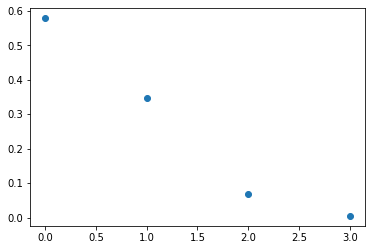

In [88]:
plt.plot(x,y, 'o') # 'o'すると 離散型のグラフになる

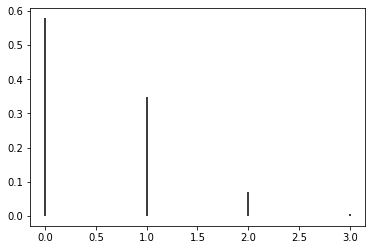

In [89]:
plt.vlines(x, 0, y)

In [90]:
### 二項分布

In [103]:
n = 100
p=1/6
x = np.arange(n+1)
y = stats.binom(n=n, p=p).pmf(x)

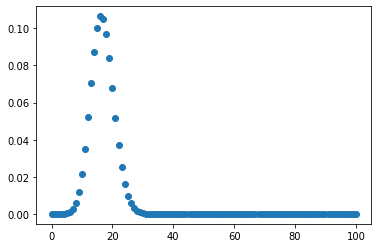

In [104]:
plt.plot(x,y, 'o')

In [105]:
## 平均
stats.binom(n, p).mean()

16.666666666666664

In [106]:
n*p

16.666666666666664

In [109]:
n*p*(1-p)

13.888888888888888

In [111]:
## npq
stats.binom(n,p).var()

13.888888888888888

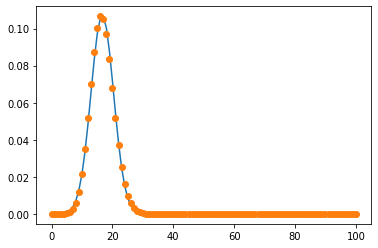

In [120]:
y2 = stats.norm(n*p, np.sqrt(n*p*(1-p))).pdf(x)
plt.plot(x,y2)
plt.plot(x,y, 'o') #上記のグラフとkさねて表示できる